<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/TimeSeriesAnlaysis_Forecasting_Autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Time Series - Autoregression 

Autoregression modeling is a modeling technique used for time series data that assumes linear continuation of the series so that previous values in the time series can be used to predict futures values. Some of you may be thinking that this sounds just like a linear regression – it sure does sound that way and is – in general – the same idea with additional features of the model that includes the idea of ‘lag variables’.

    y = a + b1X(t-1) + b2X(t-2) + b3*X(t-3)

where a, b1, b2 and b3 are variables found during the training of the model and X(t-1), X(t-2) and X(t-3) are input variables at previous times within the data set.

For this type of modeling, you need to be aware of the assumptions that are made prior to beginning working with data and autoregression modeling.

Assumptions:

    The previous time step(s) is useful in predicting the value at the next time step (dependance between values)
    Your data is stationary. A time series is stationary if is mean (and/or variance) is constant over time. There are other 
    statistical properties to look at as well, but looking at the mean is usually the fastest/easiest.

If your time series data isn’t stationary, you’ll need to make it that way with some form of trend and seasonality removal (we’ll talk about that shortly). If your time series data values are independent of each other, autoregression isn’t going to be a good forecasting method for that series.

In [ ]:
#import all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,7)
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df=pd.read_csv('datasets/GlobalLandTemperaturesByState.csv',parse_dates=['dt'],index_col='dt')
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1855-05-01,25.544,1.171,Acre,Brazil
1855-06-01,24.228,1.103,Acre,Brazil
1855-07-01,24.371,1.044,Acre,Brazil
1855-08-01,25.427,1.073,Acre,Brazil
1855-09-01,25.675,1.014,Acre,Brazil


<AxesSubplot:xlabel='dt'>

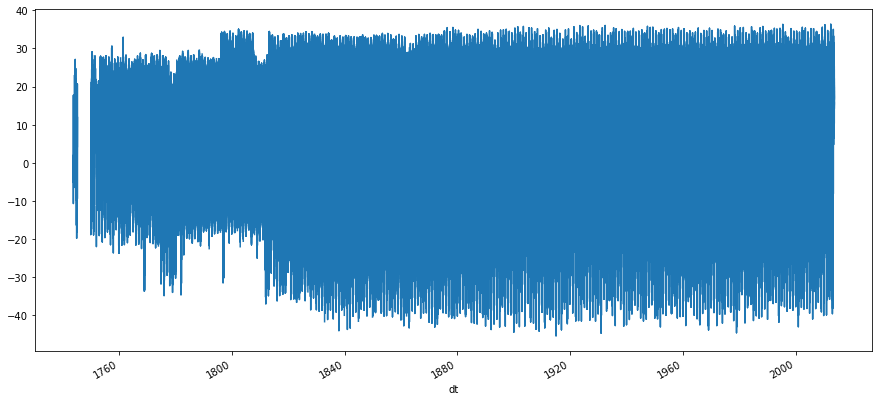

In [ ]:
df['AverageTemperature'].plot()

Conclusion :

        Data is for various contries. We will consider data only for India for further use.

## Data Preprocessing, EDA and Visualization

In [ ]:
india=df[df['Country']=='India']
india.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1796-01-01,26.534,1.904,Andaman And Nicobar,India
1796-02-01,26.294,1.122,Andaman And Nicobar,India
1796-03-01,26.180,1.959,Andaman And Nicobar,India
1796-04-01,27.942,1.281,Andaman And Nicobar,India
1796-05-01,28.651,1.119,Andaman And Nicobar,India


In [ ]:
india.isna().sum()

AverageTemperature               5044
AverageTemperatureUncertainty    5044
State                               0
Country                             0
dtype: int64

In [ ]:
india=india.dropna()
india.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

<AxesSubplot:xlabel='dt'>

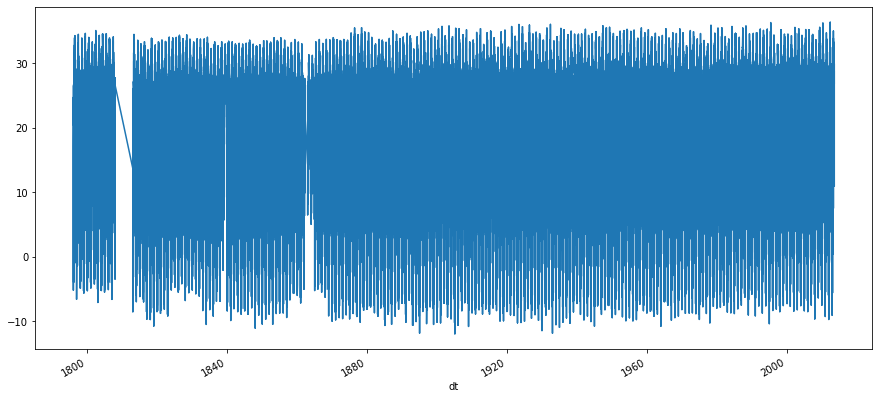

In [ ]:
india['AverageTemperature'].plot()

**we can see irregularity in data, so We will consider data of 1870 and onwards**

In [ ]:
india=india.loc['1870-01-31':'2013-08-01',]
india.shape

C:\Users\DI\anaconda3\lib\site-packages\pandas\core\indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


(58574, 4)

<AxesSubplot:xlabel='dt'>

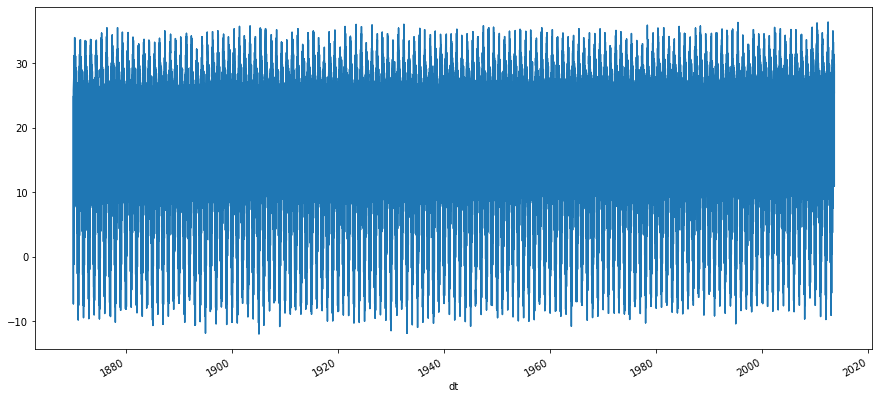

In [ ]:
india['AverageTemperature'].plot()

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

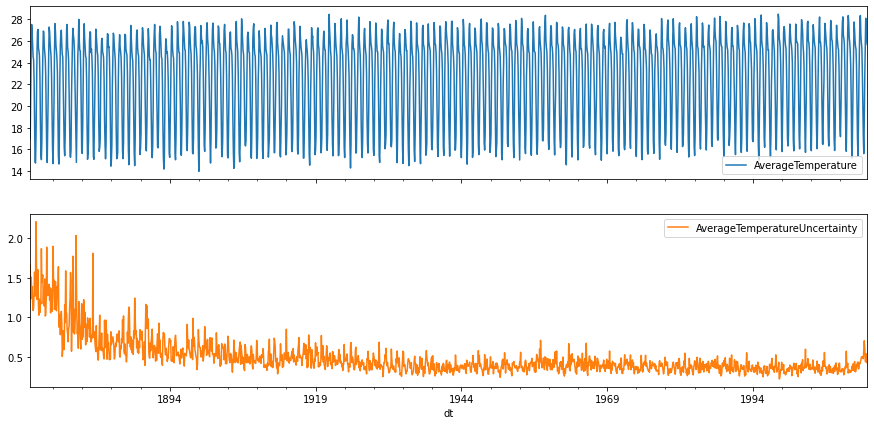

In [ ]:
# For better visualization

month=india.resample("M").mean()
month.plot(subplots=True)

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

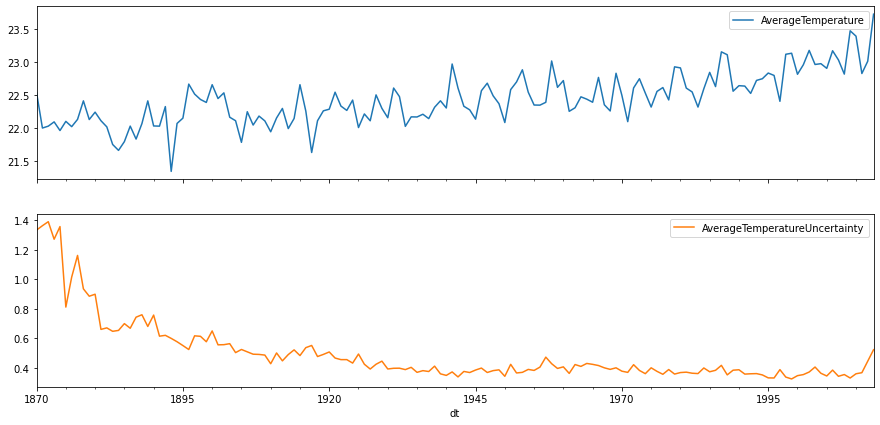

In [ ]:
# get data according to year 
year=india.resample("Y").mean()

year.plot(subplots=True)

In [ ]:
#find max temperature reported
india_max=india[india.AverageTemperature==india.AverageTemperature.max()]
india_max

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
2012-06-01,36.339,0.385,Delhi,India


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

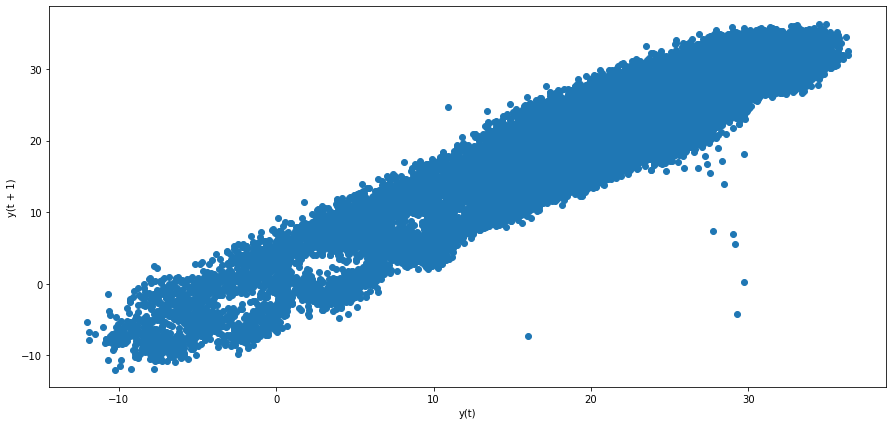

In [ ]:
pd.plotting.lag_plot(india['AverageTemperature'])

Conclusion :

        We can observe linear behaviour in between present temperature and preciding temperature.

**Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

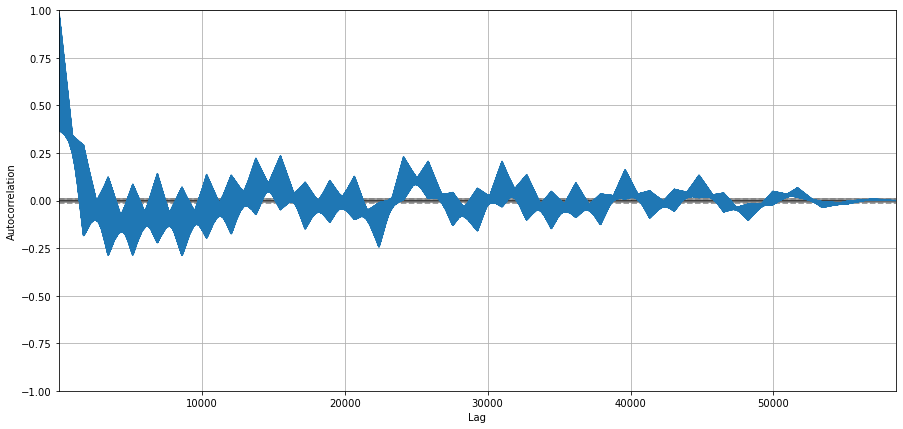

In [ ]:
pd.plotting.autocorrelation_plot(india['AverageTemperature'])

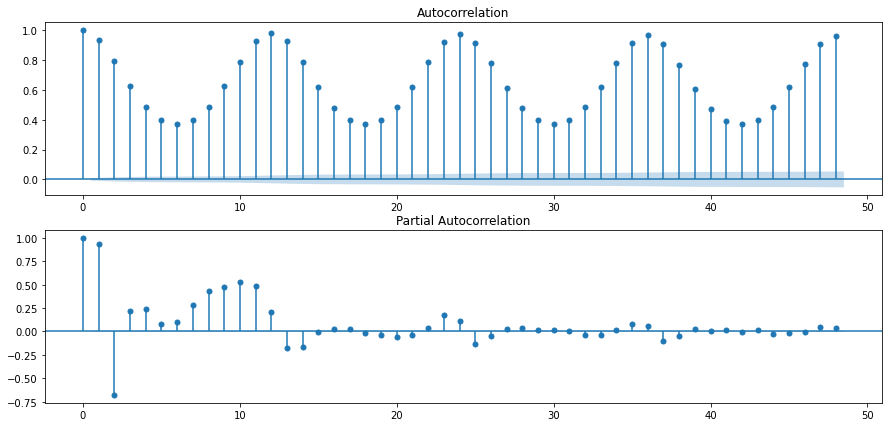

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2)

axs[0].set_title("ACF plot")
plot_acf(india['AverageTemperature'], ax = axs[0])

axs[1].set_title("PACF plot")
plot_pacf(india['AverageTemperature'], ax = axs[1])

plt.show()

The value of autocorrelation varies between +1 & -1. If the autocorrelation of series is a very small value that does not mean, there is no correlation. The correlation could be non-linear.

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=india['AverageTemperature']
output=adfuller(x)
p_val=output[1]


if p_val > 0.05:
  print("Non Stationary")
else :
  print("Stationary")

Stationary


In [ ]:
from statsmodels.tsa.ar_model import AR
X = df['st_sales'].dropna()
model = AR(X)
model_fitted = model.fit()

## Fit and Forecast

In [ ]:
from statsmodels.tsa.ar_model import AR
model = AR(x)
result = model.fit()

C:\Users\DI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\DI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [ ]:
print('The lag value chose is: %s' % result.k_ar)

print('The coefficients of the model are:\n %s' % result.params)

The lag value chose is: 59
The coefficients of the model are:
 const                     0.058816
L1.AverageTemperature     0.665511
L2.AverageTemperature     0.034200
L3.AverageTemperature    -0.011927
L4.AverageTemperature    -0.042269
L5.AverageTemperature    -0.008618
L6.AverageTemperature    -0.012597
L7.AverageTemperature    -0.029447
L8.AverageTemperature     0.059100
L9.AverageTemperature     0.046927
L10.AverageTemperature    0.081292
L11.AverageTemperature    0.152134
L12.AverageTemperature    0.159716
L13.AverageTemperature   -0.033184
L14.AverageTemperature   -0.075882
L15.AverageTemperature   -0.009592
L16.AverageTemperature   -0.009073
L17.AverageTemperature    0.027017
L18.AverageTemperature   -0.017520
L19.AverageTemperature   -0.012726
L20.AverageTemperature   -0.011803
L21.AverageTemperature   -0.020356
L22.AverageTemperature   -0.054042
L23.AverageTemperature    0.055684
L24.AverageTemperature    0.146100
L25.AverageTemperature   -0.084443
L26.AverageTemperature   -0

In [ ]:
pred=result.predict()

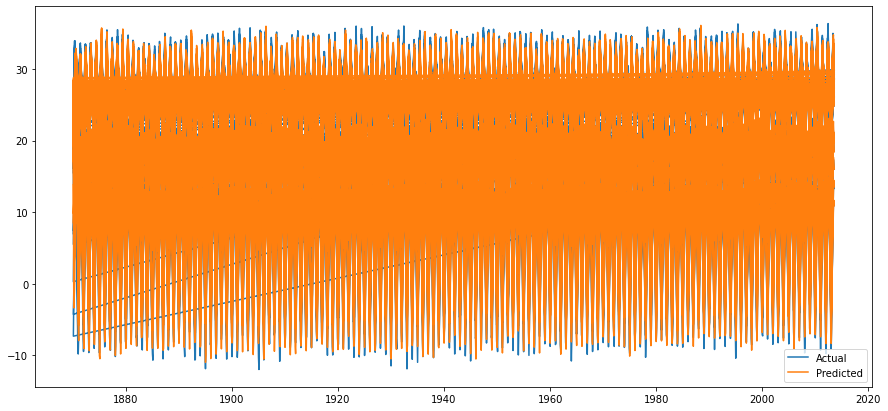

In [ ]:
plt.plot(x,label="Actual")
plt.plot(pred,label="Predicted")
plt.legend()

In [ ]:
residual=result.resid

<AxesSubplot:ylabel='Density'>

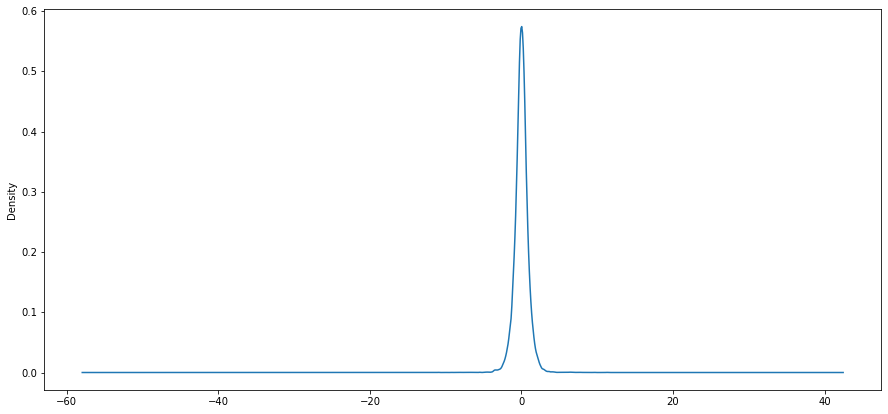

In [ ]:
residual.plot(kind="kde")